### TMA4215 Numerisk Matematikk 

Høst 2021 – October, 8, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Problem Sheet 4

## Deadline
October 15, 2021, 23:59


## Submission
submit your Jupyter notebook containing the solution via upload in blackboard.

## Problem 1

We consider the generalized eigenvalue problem: Let $A, B \in \mathbb FR^{n\times n}$ be symmetric positive definite matrices. Then, a pair $(\lambda, \mathbf x) \in \mathbb R\times \mathbb R^n$ is a generalized  eigenvalue $\lambda$ with generalized eigenvector $\mathbf x$ if

$$
A\mathbf x = \lambda B\mathbf x
$$

holds.

Prove that the smallest and largest eigenvalues $\lambda_{\mathrm{min}},\lambda_{\mathrm{max}}$ of the generalized eigenvalues can be computed as

$$
\lambda_{\mathrm{max}}
  =
    \min_{\substack{\mathbf{x}\in\mathbb R^n \\ \mathbf{x}\neq\mathbf{0}}}
    \frac{\mathbf{x}^\mathrm{T} A\mathbf{x}}
    {\mathbf{x}^\mathrm{T} B \mathbf{x}}
  \qquad\text{and}\qquad
    \lambda_{\mathrm{max}}
  =
    \max_{\substack{\mathbf{x}\in\mathbb R^n \\ \mathbf{x}\neq\mathbf{0}}}
    \frac{\mathbf{x}^\mathrm{T} A\mathbf{x}}
    {\mathbf{x}^\mathrm{T} B \mathbf{x}}.
$$

_Hint_: Use the Rayleigh quotient (from Project 1) and the Cholesky decomposition.

If $
A\mathbf x = \lambda B\mathbf x
$ holds,then $x^T A x = \lambda x^T B x$ holds, and cholesky factorysing gives ${x^T  L_A^T L_A x} = \lambda {x^T  L_B^T L_B x}$ and 

$\frac{\lVert L_A x \rVert_2}{\lVert L_B x \rVert_2} = \lambda$ holds. Because the scalably homogenity property of the norm we can also argue that the norm of x doesnt matter, as a scalar $\neq 0 $ gets cancelled when applied both in the numerator and denominator. We then obtain 
$$ \lambda = \frac{\lVert L_A x \rVert_2}{\lVert L_B x \rVert_2} = \frac{x^T A x}{x^T B x}, x \neq 0$$

From it follows that the maximum eigenvalue is the maximum of this expression, and the minimum is also the minimum.

## Problem 2

We are given the following nodes $x_j$ with their values

| $x_j$ | $-1$ | $1$ | $2$ |
| --- | ---- | --- | --- |
| $y_j$ | $1$ | $3$ | $2$ |

1. Compute the function $f_a$ in the following span of Ansatz functions
   $$
    \operatorname{span} \bigl\{(x+1)^2, (x-1)^2,(x-2)^2 \bigr\}
   $$
   for the nodes and values given above.
2. Compute the interpolating function $f_b$ in the following span of Ansatz functions
   $$
   \operatorname{span} \bigl\{\sin(\tfrac{\pi}{2} x), \cos(\tfrac{\pi}{2} x), \cos (\pi x)\bigr\}
   $$
   for the nodes and values given above.
3. Compute the interpolation polynomial $p_2 \in \mathbb P_2$ for the nodes and values given above.
4. Plot the three functions from the first 3 tasks in one plot on the interval $[-1.5, 2.5]$
5. Compute the value $p_{12}(2)$ of the interpolatory polynomial $p_{12} \in \mathbb P_{12}$ which interpolates the function 
   $$
   f(x) 
   = 
   (3x^3-3x+3)^3
   $$
   in the nodes $x_j = \frac{j}{12}$, $j = 0,\dots,12$, i.e. it holds $y_j = f(x_j) = p_{12}(x_j)$ for $j = 0,\ldots,12$.

##### 2.1)

In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

We got the function in the span of the basis represented as
$$
a (x + 1)^2 + b(x - 1)^2 + c(x - 2)^2 = y
$$
Inserting the x's and y's we get the three equations represented in matrix form as
$$
\left[\begin{matrix}4b + 9c = 1\\4a +c = 3 \\9a + b = 2 \end{matrix}\right]
\iff \left[\begin{matrix}0 & 4 & 9 \\4 & 0 & 1 \\9 & 1 & 0 \end{matrix}\right] \left[\begin{matrix}a\\b\\c\end{matrix}\right]
= \left[\begin{matrix}1\\3 \\2\end{matrix}\right]
$$

In [3]:
A = smp.Matrix([[0, 4, 9],
                [4, 0, 1],
                [9, 1, 0]])
b = smp.Matrix([1,3,2])
print(smp.latex(A.solve(b)))
A
print(smp.latex(A))

\left[\begin{matrix}\frac{17}{36}\\- \frac{9}{4}\\\frac{10}{9}\end{matrix}\right]
\left[\begin{matrix}0 & 4 & 9\\4 & 0 & 1\\9 & 1 & 0\end{matrix}\right]


This means 
$$
\left[\begin{matrix}a\\b\\c\end{matrix}\right] = \left[\begin{matrix}\frac{17}{36}\\- \frac{9}{4}\\\frac{10}{9}\end{matrix}\right]
$$

##### 2.2)
Inserting the x's in the formula $a\sin(\tfrac{\pi}{2} x) + b\cos(\tfrac{\pi}{2} x)+c\cos (\pi x)$ we obtain the linear system 
$$
\left[\begin{matrix}-a + -c = 1\\a + -c = 3 \\-b + c = 2 \end{matrix}\right]
\iff \left[\begin{matrix}-1 & 0 & -1 \\1 & 0 & -1 \\0 & -1 & 1 \end{matrix}\right] \left[\begin{matrix}a\\b\\c\end{matrix}\right]
= \left[\begin{matrix}1\\3 \\2\end{matrix}\right]
$$
which easly gives the solution 
$$
\left[\begin{matrix}a\\b\\c\end{matrix}\right] = \left[\begin{matrix}1\\-4\\-2\end{matrix}\right]
$$

##### 2.3 
Because the interpolating polynomial of order 2 is unique for three nodes, we can just cnge basis on the 2.1) representation to basis $\operatorname{span} \bigl\{1, x, x^2 \bigr\}$, and we can just insert $\left[\begin{matrix}a\\b\\c\end{matrix}\right] = \left[\begin{matrix}\frac{17}{36}\\- \frac{9}{4}\\\frac{10}{9}\end{matrix}\right]$ in $ a (x + 1)^2 + b(x - 1)^2 + c(x - 2)^2 $, and we get 
$$
- 0.666666666666667 x^{2} + 1.0 x + 2.66666666666667
$$

In [4]:
a, b, c = 17/36, -9/4, 10/9
x = smp.symbols("x")
p_2 = a*(x+1)**2 + b*(x-1)**2 + c*(x-2)**2
print(smp.latex(smp.simplify(p_2)))

- 0.666666666666667 x^{2} + 1.0 x + 2.66666666666667


##### 2.4)
We call the functions from 2.1, 2.2 and 2.3 for $p_1, p_2, p_3$ respectivly

In [5]:
def p1(x):
    a, b, c = 17/36, -9/4, 10/9
    return a*(x+1)**2 + b*(x-1)**2 + c*(x-2)**2

def p2(x):
    return np.sin(np.pi/2*x) - 4 * np.cos(np.pi/2*x) - 2 * np.cos(np.pi*x)

def p3(x):
    return -2/3 * x**2  +x + 8/3

In [6]:
xs = np.linspace(-1.5,2.5,100)
y1s = np.array([p1(x) for x in xs])
# y1s = p1(xs) syyyk denne her
y2s = np.array([p2(x) for x in xs])
y3s = np.array([p3(x) for x in xs])
ys = np.array([y1s,y2s,y3s])

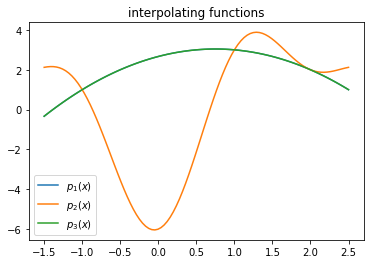

In [7]:
plt.title("interpolating functions")
plt.plot(xs,y1s, label = "$p_1(x)$")
plt.plot(xs,y2s, label = "$p_2(x)$")
plt.plot(xs,y3s, label = "$p_3(x)$")
plt.legend()

##### 2.5) 
We Lagrangean cardinal functions with the nodes $x_j = \frac{j}{12}, j = 0,1,...,12$ and corresponding values $f(x_j)$

In [8]:
def f(x):
    return (3 * x**3 - 3*x + 3)**3

def lagrange_cardinaals(x, xs, ys):
    n = len(xs)
    zum = 0
    for i in range(n):
        Li = 1
        for j in range(n):
            if i == j:
                continue
            #Here we just use the memory already allocated for ys and overwrite it with the lagrange cardinal
            Li *= (x-xs[j])/(xs[i]-xs[j])
        zum += Li*ys[i]
    return zum

In [9]:
xs = np.linspace(0,1,13,endpoint=True)
x = np.linspace(0,1)
ys = f(xs)
interpol = lagrange_cardinaals(2, xs, ys)
print(f"p(2) = {interpol:.2f}")

p(2) = 9261.00


We input $x = 2$ into the interpolationg polynomial and we get
$$
p(2) = 9261.00
$$

Below we also plot the function to see if the nodes have the right values, which seems okei.

In [10]:
x = np.linspace(0,1)
ys2 = lagrange_cardinaals(x, xs, ys)

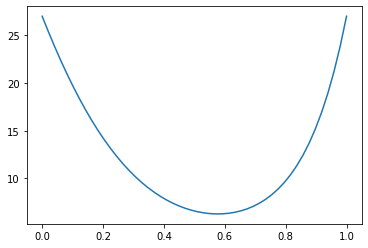

In [11]:
plt.plot(x,ys2)

## Problem 3
  Let the following interpolation points (nodes & values) be given:
  $$
    (-1,0),(0,1),(2,-2).
  $$
  1. Compute the interpolatory polynomial $p_{\mathrm{L}}\in \mathcal P_2$ in Lagrange form.
  2. Compute the interpolatory polynomial $p_{\mathrm{N}}\in \mathcal P_2$ in Newton form.
  3. Write both $p_{\mathrm{L}}$ and $p_{\mathrm{N}}$ in monomial form and check that both fulfill the interpolation properties; further compute $p_{\text{L}}(1)$ and $p_{\text{N}}(1)$.
  4. We obtain the additional point $(3,0)$. Compute the new interpolatory polynomial $p_3 \in \mathcal P_3$ with a method of your own choice. Compute the value $p_3(1)$.

##### 3.1) and 3.2)

In [12]:
def pL(x):
    return 0*(x**2 - 2*x)/3 - 1*(x**2 - x - 2)/2 - 2*(x**2 + x)/6
def pN(x):
    return -5/6*(x + 1)*x + (x + 1)

In monomial form we get
$$
p_L = -\frac{5}{6} x^2 + \frac{1}{6}x + 1
$$
and
$$
p_N = -\frac{5}{6} x^2 + \frac{1}{6}x + 1
$$
which are of course the same as the polynomial of degree m interpolating m+1 nodes is unique.

##### 3.3)

In [13]:
for x in [-1,0,2]:
    print(f"pL({x}) = {pL(x)} and pN({x}) = {pN(x)}")

pL(-1) = 0.0 and pN(-1) = 0.0
pL(0) = 1.0 and pN(0) = 1.0
pL(2) = -2.0 and pN(2) = -2.0


In [14]:
print(f"pL(1) = {pL(1)} and pN(1) = {pN(1)}")

pL(1) = 0.33333333333333337 and pN(1) = 0.33333333333333326


In [15]:
# testcode
# xs = [i for i in range(10)]
# ys = [pL(x) for x in xs]
# ys

##### 3.4)
As newtons method is recursive, we only need to iterate one more time with newton differences, where as for lagrange cardinal funcitons we have to start over. The choice is there for easy on which method to use if we want to increase the numbers of nodes and polynomial degree after already calculated for one choice of m. One more iteration of newtons method gives
$$
p_3 = f[x_1 x_2 x_3 x_4](x - x_0)(x - x_1)(x - x_2) + p_2
$$


## Problem 4

For the nodes $\Delta_3 = [0, 1, 2, 3]$
we consider the piecewise linear splines, i.e. $s \in \mathcal S_1$ written as a linear combination of the corresponding $B$-spline basis (“hat functions”)
$$
s(x)
=
\sum_{k = 0}^{3} c_k B_{i,2}(x).
$$
1. Compute the normalized B splines $B_{i,2}$, $i=0,\ldots,3,$
2. (interpolation nodes are equal to the spline nodes)
   
   Compute the linear spline of $\Delta_3$ to interpolate

   | $t_j=x_j$ | $0$ | $1$ | $2$ | $3$ |
   | --- | --- | --- | --- | --- |
   | $y_j$ | $1$ | $3$ | $4$ | $8$ |

   Sketch the solution first or explain why this is easy to solve.

3. (interpolation nodes are equal to the spline nodes)
   Compute the linear spline from $\Delta_3$, i.e. the functions from part 1 or to be even more precise the $c_k$ in the first formula of this problem, such that $s(x)$ interpolates

   | $t_j$ | $0$ | $0.5$ | $2.2$ | $3$ |
   | --- | --- | --- | --- | --- |
   | $y_j$ | $1$ | $3$ | $4$ | $8$ |

   It might be helpful to first make a sketch where the nodes $x_i$ of the splines and where the interpolation points $t_i$ lie. State both the coefficients $c_k$ as well as the explicit formula of the resulting spline $s$ on the intervals $[0, 1)$, $[1, 2)$ and $[2, 3]$.
  2. Is the method from the last point for interpolation points $t_0, t_1, t_2, t_3 \in [0, 3]$ uniquely determined?

##### 4.1)

We get with De Boor's algorithm
$$
B_{-1,2} = \left[\begin{matrix}1 + x, & x \in [-1,0)\\1 - x, & x \in [0,1)\end{matrix}\right]
$$

$$
B_{0,2} = \left[\begin{matrix}x, & x \in [0,1)\\2 - x, & x \in [1,2)\end{matrix}\right]
$$

$$
B_{1,2} = \left[\begin{matrix}x - 1, & x \in [1,2)\\3 -x, & x \in [2,3)\end{matrix}\right]
$$

$$
B_{2,2} = \left[\begin{matrix}x - 2, & x \in [2,3)\\4 -x, & x \in [3,4)\end{matrix}\right]
$$

<!-- $$
B_{0,2} = \left[\begin{matrix}a_0 x + b_0, & x \in [0,1)\\c_1 (x-1), & x \in [1,2)\end{matrix}\right]
$$

$$
B_{1,2} = \left[\begin{matrix}x - 1, & x \in [1,2)\\3 - x, & x \in [2,3)\end{matrix}\right]
$$

etc... -->

##### 4.2)
If we take a linear combination of these B-splines that satisfies
$$
   | t_j=x_j | 0 | 1 | 2 | 3 |
   | --- | --- | --- | --- | --- |
   | y_j | 1 | 3 | 4 | 8 |
$$
we can because they are linear without much work see that $c_0 = 1$ for $s(0) = 1$, $c_1 = 3$ for $s(0) = 3$, $c_2 = 4$ for $s(2) = 4$, $c_3 = 8$ for $s(3) = 8$. 
This is basicly sketching straight lines.

##### 4.3)

$$
B_{-1,2} = \left[\begin{matrix}1 + x, & x \in [-1,0)\\1 - 2x, & x \in [0,0.5)\end{matrix}\right]
$$

$$
B_{0,2} = \left[\begin{matrix}2x, & x \in [0,0.5)\\\frac{2.2 - x}{1.7}, & x \in [0.5,2.2)\end{matrix}\right]
$$

$$
B_{1,2} = \left[\begin{matrix}\frac{x - 0.5}{1.7}, & x \in [0.5,2.2)\\\frac{3 - x}{0.8}, & x \in [2.2,3)\end{matrix}\right]
$$

$$
B_{2,2} = \left[\begin{matrix}\frac{x - 2.2}{0.8}, & x \in [2.2,3)\\4 - x, & x \in [3,4)\end{matrix}\right]
$$

With these B-splines, $c_i = {1, 3, 4, 8}$ again. Note the splines are different, and the $s_k$ function therefore is different.